# Ch.5 Regression

## 5.4 보스턴 주택 가격 예측

In [22]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [25]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
print(bostonDF.shape)
print(bostonDF.head())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


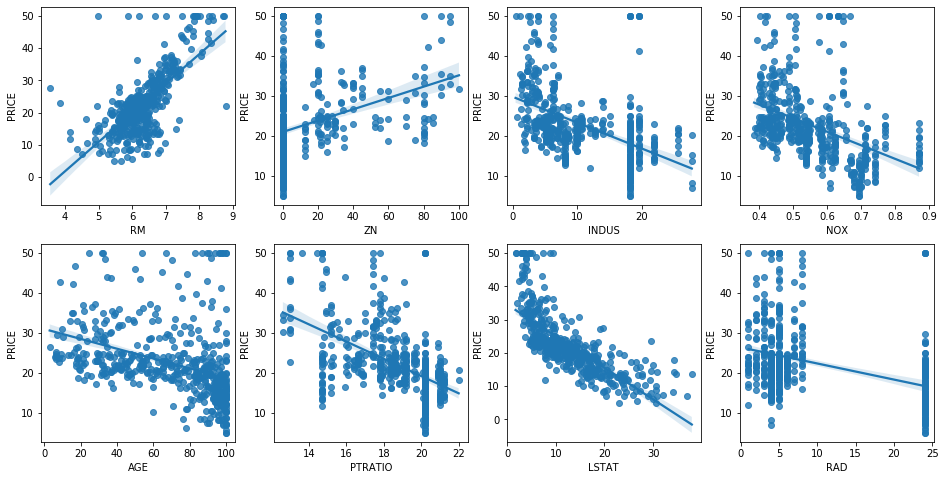

In [27]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [28]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# 단일 변수에 대한 선형 회귀

In [29]:
X = bostonDF['RM']
Y = boston.target

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

- 모델 불러와 객체 생성

In [31]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

- 모델 학습하기

In [32]:
sim_lr.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Pandas 의 Data의 형태 -> Series
### Sckitlearn은 numpy 형태로 넣어줘야함.
### reshape로 numpy형태로 바꿔줌

In [33]:
y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))

## 결과 확인하기

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3142680653182036

- 계수 w(weight), 절편 b(bias)

In [35]:
sim_lr.coef_, sim_lr.intercept_

(array([9.57347375]), -37.808387475389736)

In [36]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))

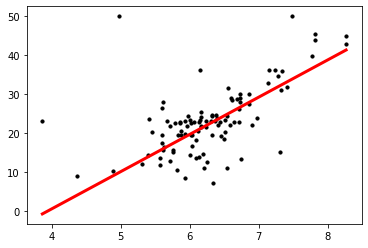

In [37]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [38]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4, 8])
ys = - xs * w + b

NameError: name 'y1' is not defined

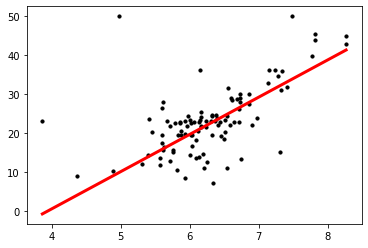

In [39]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs, (y1,y2), c='blue', lw=3, ls='--')
plt.show()

- 도출한 회귀식 PRICE = 0.99 * PM -40.09)

In [40]:
random_state = 19

In [41]:
X = bostonDF['LSTAT']
Y = boston.target

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [43]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

sim_lr.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4981043243299973

In [46]:
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))

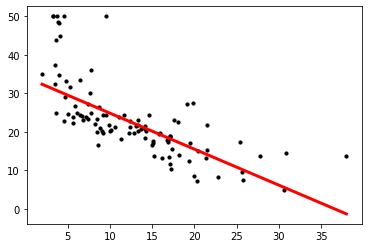

In [47]:
plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

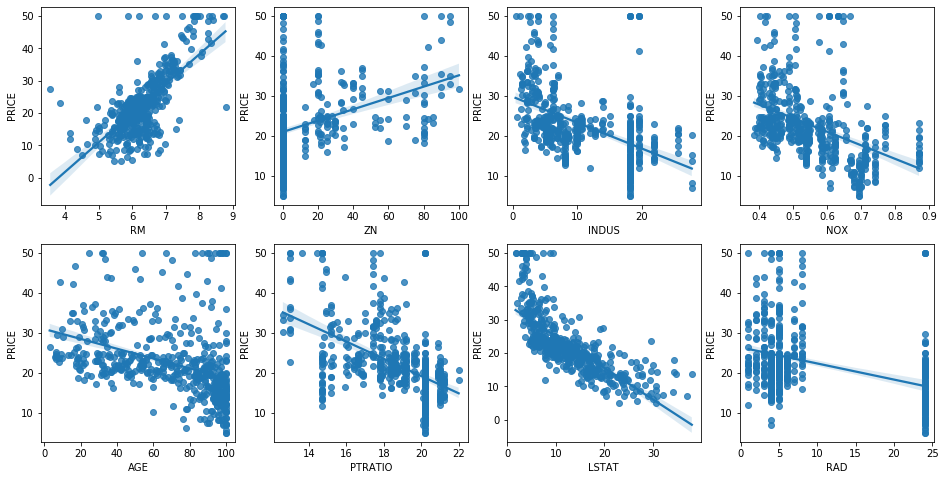

In [48]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [49]:
# Matplotlib 사용과 한글 처리를 위한 Code
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False # minus 표시
mpl.rc('font', family = 'Malgun Gothic')
%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 14

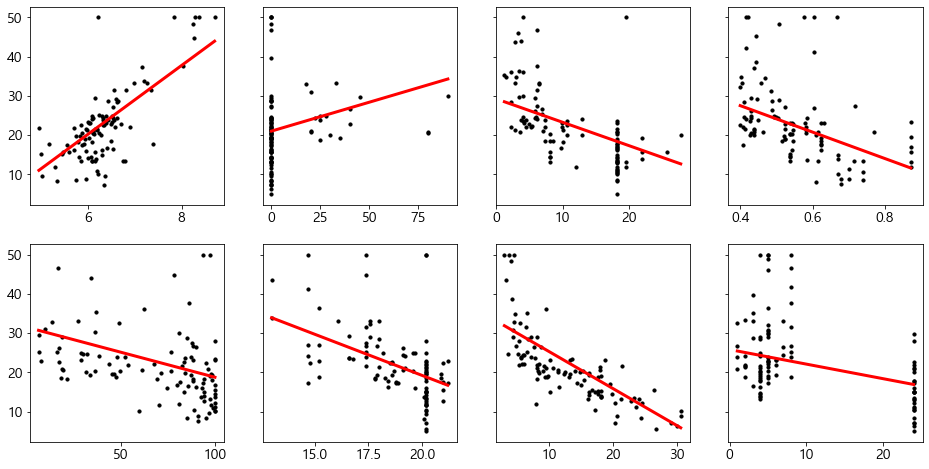

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def single_regression(x_train, x_test, y_train, y_test):
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1,1), y_train)
    y_pred = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

#X = bostonDF['RM']

Y = boston.target

fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2, sharey=True)

for i, X in enumerate(lm_features):
    X_train, X_test, y_train, y_test = train_test_split(bostonDF[X], boston.target, test_size=0.2)
    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1, 1), y_train)
    y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))
    
    row = i // 4
    col = i % 4

    ax=axs[row][col]
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
    line_y = sim_lr.predict(line_x.reshape(-1, 1))
    ax.scatter(X_test, y_test, s=10, c='black')
    ax.plot(line_x, line_y, c='red', lw=3)

#     X = bostonDF[feature]
#     x_train, x_test, y_train, y_test = \
#         train_test_split(X, boston.target, test_size=0.2, 
#                          random_state=19)
#     rmse, weight, bias = single_regression(x_train, x_test, y_train, y_test)
    
#     row = i // 4
#     col = i % 4
#     ax = axs[row][col]
#     ax.scatter(x_test, y_test, s=10, c='black')
#     xline = np.array([np.min(x_test), np.max(x_test)])
#     yline = weight * xline + bias
#     ax.plot(xline, yline, c='red', lw=3)
#     ax.set_title(feature+': '+str(rmse))
    
plt.show()



In [51]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [55]:
    ## RMSE
from sklearn.metrics import mean_squared_error

def single_regression(x_train, x_test, y_train, y_test):
    sim_lr = LinearRegression()
    sim_lr.fit(X_train.values.reshape(-1, 1), y_train)
    y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))
    rmse = np.round(np.sqrt(mean_squared_eror(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_


X_train, X_test, y_train, y_test = train_test_split(bostonDF[X], boston.target, test_size=0.2) 

IndentationError: expected an indented block (<ipython-input-55-2b72fe55e95b>, line 5)

## Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = bostonDF['LSTAT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train.values.reshape(-1, 1), y_train)
y_preds = lr.predict(X_test.values.reshape(-1, 1))
dt_regr = DecisionTreeRegressor(y_test, y_preds, max_depth=5)

rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
rmse_lr

9.27

## Support Vector Machine Regressor

In [58]:
from sklearn.svm import SVR
svm_regr = SVR()
svm_regr.fit(X_train.values.reshape(-1, 1), y_train)
y_preds = svm_regr.predict(X_test.values.reshape(-1, 1))

svm_regr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
svm_regr

9.27

In [59]:
dt_regr = DecisionTreeRegressor(y_test, y_preds, max_depth=5)
dt_regr

DecisionTreeRegressor(ccp_alpha=0.0,
                      criterion=array([21.6, 27. , 23.7, 20.1,  8.4, 37.3, 20.5, 23.7, 13.5, 16.2, 17.2,
       14.9, 32. , 23.9, 19. , 19.3, 15. , 31.2, 24.7, 21.7, 29. , 33.2,
       10.4, 12.7, 15.7, 41.7, 50. , 19.2, 21.4, 13. , 13.3, 21.8, 15.6,
       17.4, 24.7, 16.4, 20.8, 46.7, 20.4, 12.3, 29. , 50. ,  8.8, 21.5,
       13.3, 17.8, 21.1, 19.1, 24.1, 24.6,  9.7, 36.1, 21. , 22.4, 18. ,
       22. , 50. , 13.1, 23.3, 18.9, 19.5, 14.5, 20....
       24.1140196 , 29.53543309, 31.90914611, 16.36398978, 15.47614585,
       32.40545929, 18.50526946, 20.22128659, 13.05741432, 17.44947083,
       22.81708183, 15.9785478 , 20.1161354 , 20.91816902, 12.9103171 ,
       23.88286847, 22.4040445 , 22.49772427, 31.90914611, 29.24509172,
       24.18789937, 25.31580648, 24.67864247, 19.71998514, 17.66888057,
       22.37337859, 16.92235856, 21.17161529, 14.83407176, 18.03159922,
       22.23392201, 25.03310358]))

## 다중 회귀

In [62]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [70]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.3f}, RMSE : {1:.3f}".format(mse, rmse))
print('Variace score : {0:.3f}'.format(r2_score(y_test, y_preds)))
print('Intercept : ', lr.intercept_)
print('회귀 계수 : ', np.round(lr.coef_, 1))

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

MSE : 17.297, RMSE : 4.159
Variace score : 0.757
Intercept :  40.995595172164336
회귀 계수 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [74]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_scroe()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scroes)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds 의 개별 negative MSE scores: ',np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


In [102]:
neg_mean_squared

NameError: name 'neg_mean_squared' is not defined

## 5-5. 다항 회귀

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly = PolynomialFeatures(degree=2)
X = bostonDF['LSTAT']
y = boston.target
pf = poly.fit_transform(X.values.reshape(-1, 1))

#def Polynomial_func(X):
#    y = 1 + 2*X)
pf.shape

(506, 3)

In [94]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=2019)
pf_train = poly.fit_transform(X_train.values.reshape(-1, 1))
pf_test = poly.fit_transform(X_test.values.reshape(-1, 1))


In [95]:
lr = LinearRegression()
lr.fit(pf_train, y_train)
y_pred = lr.predict(pf_test)

rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred,)), 2)
rmse

5.34

In [107]:
print(lr.coef_, '\n', lr.intercept_)

[ 0.         -2.47262189  0.04716606] 
 44.01462657247066


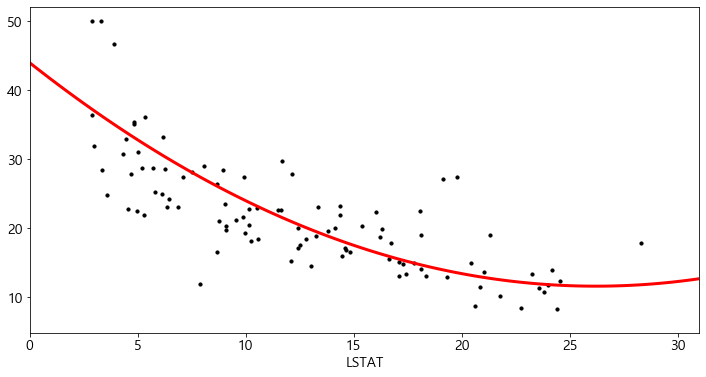

In [155]:
xs = np.linspace(0, 31, 100)
line_x = poly.fit_transform(xs.reshape(-1, 1))
line_y = lr.predict(line_x)
plt.scatter(X_test, y_test, s=10, c='black')
plt.plot(xs, line_y, c='red', lw=3)
plt.xlim(0, 31)
plt.xlabel('LSTAT')
plt.show()

In [154]:
xs

array([ 0.        ,  0.31313131,  0.62626263,  0.93939394,  1.25252525,
        1.56565657,  1.87878788,  2.19191919,  2.50505051,  2.81818182,
        3.13131313,  3.44444444,  3.75757576,  4.07070707,  4.38383838,
        4.6969697 ,  5.01010101,  5.32323232,  5.63636364,  5.94949495,
        6.26262626,  6.57575758,  6.88888889,  7.2020202 ,  7.51515152,
        7.82828283,  8.14141414,  8.45454545,  8.76767677,  9.08080808,
        9.39393939,  9.70707071, 10.02020202, 10.33333333, 10.64646465,
       10.95959596, 11.27272727, 11.58585859, 11.8989899 , 12.21212121,
       12.52525253, 12.83838384, 13.15151515, 13.46464646, 13.77777778,
       14.09090909, 14.4040404 , 14.71717172, 15.03030303, 15.34343434,
       15.65656566, 15.96969697, 16.28282828, 16.5959596 , 16.90909091,
       17.22222222, 17.53535354, 17.84848485, 18.16161616, 18.47474747,
       18.78787879, 19.1010101 , 19.41414141, 19.72727273, 20.04040404,
       20.35353535, 20.66666667, 20.97979798, 21.29292929, 21.60

## 5.6 - 규제 선형 모델

In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha= 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


In [127]:
# 릿지에 사용될 aplha 파라미터의 값 정의
alphas=[0, 0.1, 1, 10 ,100]

# 평균 rmse
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score 사용
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha{0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))
    
    

alpha0 일 때 5 folds 의 평균 RMSE : 5.829
alpha0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha1 일 때 5 folds 의 평균 RMSE : 5.653
alpha10 일 때 5 folds 의 평균 RMSE : 5.518
alpha100 일 때 5 folds 의 평균 RMSE : 5.330


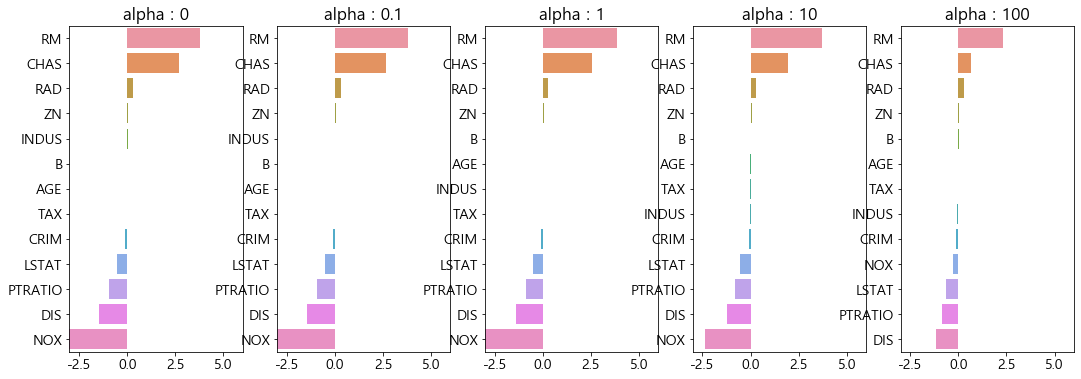

In [131]:
# 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()
# 시각화 및 데이터 저장, post는 axis의 위치 지정
for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # Data column 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha : '+str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

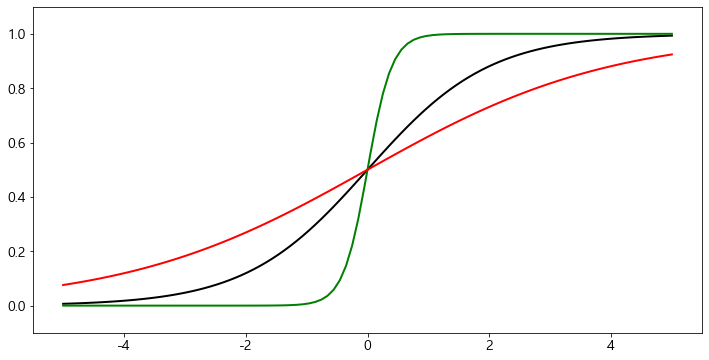

In [143]:
def sigmoid(x,w,b):
    return 1 / (1 +np.exp(-(w*x+b)))

xs = np.linspace(-5, 5, 100)
y1 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 5, 0)
y05 = sigmoid(xs, 0.5, 0)
                
plt.plot(xs, y1, lw=2, c='k')
plt.plot(xs, y5, lw=2, c='g')
plt.plot(xs, y05, lw=2, c='r')
plt.ylim(-0.1, 1.1)
plt.show()

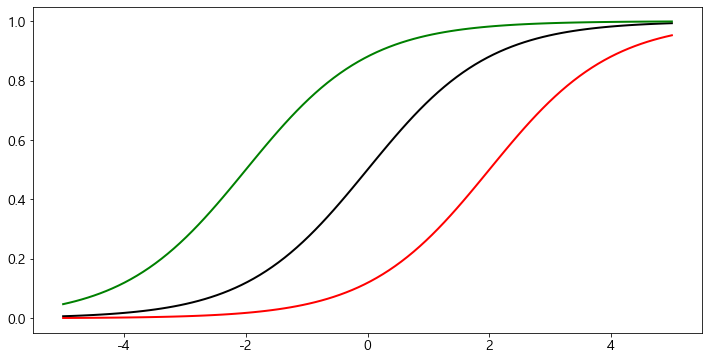

In [144]:
xs = np.linspace(-5, 5, 100)
y0 = sigmoid(xs, 1, 0)
y2p = sigmoid(xs, 1, 2)
y2m = sigmoid(xs, 1, -2)

plt.plot(xs, y0, lw=2, c='k')
plt.plot(xs, y2p, lw=2, c='g')
plt.plot(xs, y2m, lw=2, c='r')
plt.show()